## Different imports and setup

In [22]:
# Standard import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [23]:
# Machine learning libraries
from tensorflow import keras
import tensorflow as tf

In [24]:
from Tools import Plot
from Tools import Custom_models

In [25]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('Not working on GPU !')
else:
  print('Found GPU at: {}'.format(device_name))

Not working on GPU !


## Load a model

In [26]:
model_name = 'Saved_models/tanh_200_epochs'
model = keras.models.load_model(model_name)

In [27]:
model.summary()

Model: "model_1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               multiple                  200       
_________________________________________________________________
dense2 (Dense)               multiple                  9898      
_________________________________________________________________
dense3 (Dense)               multiple                  99        
Total params: 10,197
Trainable params: 10,197
Non-trainable params: 0
_________________________________________________________________


In [28]:
weights1 = model.get_layer(name='dense1').get_weights()
weights2 = model.get_layer(name='dense2').get_weights()
weights3 = model.get_layer(name='dense3').get_weights()

In [39]:
core1 = weights1[0].flatten()
bias1 = weights1[1].flatten()
core2 = weights2[0].flatten()
bias2 = weights2[1].flatten()
core3 = weights3[0].flatten()
bias3 = weights3[1].flatten()

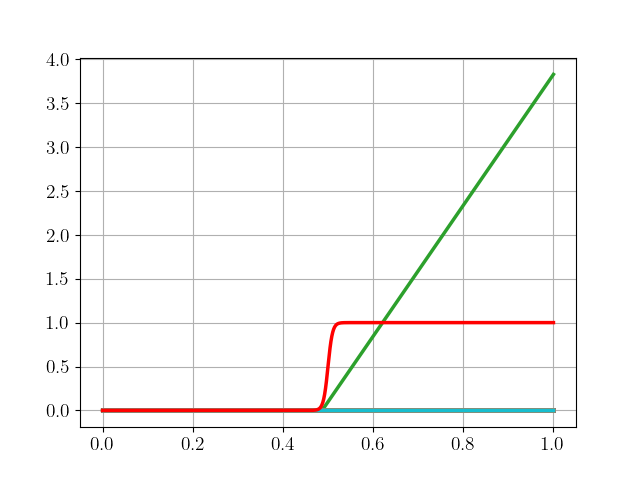

In [53]:
x = np.linspace(0, 1, 1000)
y = 1/2*(1 + np.tanh(100*(x-1/2)))

plt.figure()
for i in range(100):
    plt.plot(x, tf.nn.relu(core1[i]*x + bias1[i]))
plt.plot(x, y, 'r-')
plt.grid()
plt.show()

In [42]:
core1

array([-1.1112943e-02, -8.1125364e-02, -1.9097477e-03, -8.0368072e-03,
       -9.9250212e-02,  1.3288029e-01,  1.7771088e-01,  5.1282787e-01,
       -2.0692141e-01, -2.1151708e-01,  2.7774930e-01, -1.3657677e-01,
       -2.1133241e-01, -5.8559060e-02,  3.1765443e-01,  4.8601374e-01,
       -1.7674118e-02,  2.0770836e-01, -1.9802335e-01, -5.9953123e-02,
       -1.4353204e-01, -1.0721387e-01, -2.8406993e-02,  3.0639142e-01,
       -6.1899424e-04, -1.9368964e-01, -1.8437172e-01, -1.9244823e-01,
       -1.3381979e-01, -5.2859917e-02,  2.0759566e-02,  3.1337168e-02,
       -2.2319086e-01, -2.2897239e-01, -1.7260638e-01,  2.9143655e-01,
       -1.8307388e-01,  4.0165864e-02, -2.0103864e-01,  3.9237667e-02,
        2.2851951e-01, -1.1762110e-02, -2.2545572e-01, -2.2263974e-01,
       -1.7993253e-01,  1.3669685e-03,  1.2896341e-01,  1.2033302e-02,
       -1.9244903e-01,  2.3583721e-01, -6.7529351e-02, -1.3480359e-01,
        9.4543487e-02,  1.6279081e-01, -3.6332935e-02,  1.8061291e-01,
      

In [43]:
bias1

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.36797428e-01, -1.78233519e-01, -5.40415168e-01,
        0.00000000e+00,  0.00000000e+00, -2.78799266e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.50898266e-01, -5.93052328e-01,
       -6.15984052e-02, -2.08803758e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.94360095e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -4.22659591e-02, -7.55104795e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.91439116e-01,
       -1.83586553e-02, -3.70860994e-01,  0.00000000e+00, -1.14298955e-01,
       -2.28715152e-01, -7.13241249e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -7.10943714e-02, -1.37323841e-01, -6.62115067e-02,
        0.00000000e+00, -3.96960557e-01,  0.00000000e+00,  0.00000000e+00,
       -4.82171476e-01, -

In [51]:
-bias1/core1 < 1

array([ True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
       False])